# Import the required libnraries

In [30]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
from lib import *
import os
import soundfile as sf

# Load the data

In [31]:
# Initialize lists to store audio data and sample rates
rir = np.zeros((2, 21, 6), dtype=object) # room impluse response
sr = np.zeros((2, 21, 6), dtype=object) # sample rate

# Load audio files
folder = './data/RIRs/'
for i in range(1, 3):  # speaker
    for j in range(0, 21):  # position
        for k in range(1, 7):  # microphone
            if j < 10:
                file_path = os.path.join(folder,f's{i}_p0{j}_m{k}.wav')
            else:
                file_path = os.path.join(folder,f's{i}_p{j}_m{k}.wav')
            rir[i-1, j, k-1], sr[i-1, j, k-1] = sf.read(file_path)

sr = sr[0,0,0]

print('RIRs loaded')

RIRs loaded


In [32]:
time = np.arange(0, len(rir[0,0,0])) / sr  # Assuming same length for all audio signals
print('sample:',time.size, 'time:', time.size/sr,'s')

sample: 144000 time: 3.0 s


# Check the index of the postions and speakers

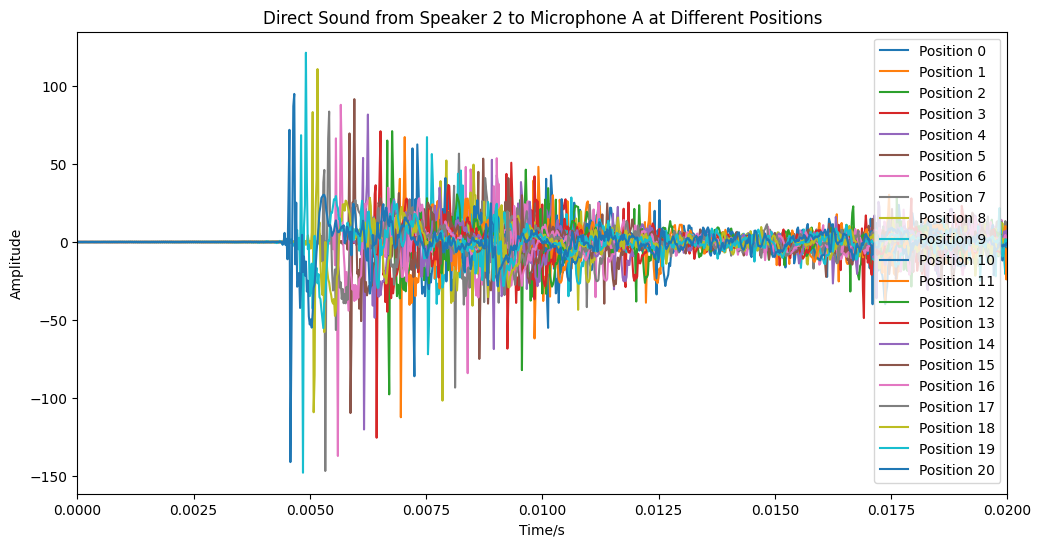

In [33]:
plt.figure(figsize=(12,6))
# Plot each line
for i in range(21):
    plt.plot(time, rir[1,i,0], label=f'Position {i}')

# Add labels and legend
plt.xlabel('Time/s')
plt.ylabel('Amplitude')
plt.title('Direct Sound from Speaker 2 to Microphone A at Different Positions') 
plt.legend()
plt.xlim(0, 0.02)
# Show the plot
plt.show()

## Conclusion: speaker and position indexes are right!

# Create the position 3D array and plot the speakers and microphones

In [34]:
# Create positions for mics and speakers in meters
p_speaker1 = np.array([1.2, 2.6, 0])
p_speaker2 = np.array([2.73, 0, 0])
p_mic = np.zeros((21, 6), dtype=object)
Radius = 0.025  # 25 mm
for j in range(0, 21):  # position
    p_center = np.array([j, 0, 0])*0.1
    p_mic[j, 0] = p_center + np.array([-Radius, 0, 0 ])
    p_mic[j, 1] = p_center + np.array([Radius, 0, 0])
    p_mic[j, 2] = p_center + np.array([0, Radius, 0])
    p_mic[j, 3] = p_center + np.array([0, -Radius, 0])
    p_mic[j, 4] = p_center + np.array([0, 0, Radius])
    p_mic[j, 5] = p_center + np.array([0, 0, -Radius])

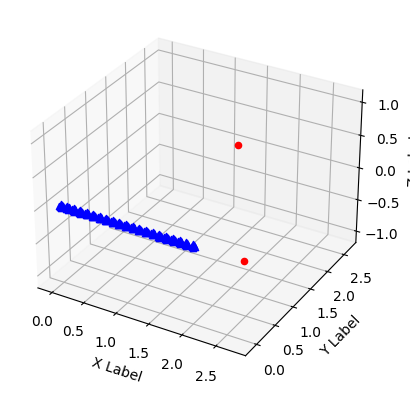

In [35]:
# plot all mics and speakers
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(p_speaker1[0], p_speaker1[1], p_speaker1[2], c='r', marker='o')
ax.scatter(p_speaker2[0], p_speaker2[1], p_speaker2[2], c='r', marker='o')
for i in range(0, 21):
    for j in range(0, 6):
        ax.scatter(p_mic[i, j][0], p_mic[i, j][1], p_mic[i, j][2], c='b', marker='^')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.axis('equal')
plt.show()

In [36]:
# calculate distance between mic and speaker
np.linalg.norm(p_mic[0, 0] - p_speaker1)

2.874130303239573